In [1]:
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
import matplotlib.style as style
from PIL import Image

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,image,source,category,id
0,000001.jpg,user,"short sleeve top, trousers","1, 8"
1,000002.jpg,shop,"short sleeve top, short sleeve top","1, 1"
2,000003.jpg,user,long sleeve dress,11
3,000004.jpg,user,long sleeve dress,11
4,000005.jpg,user,long sleeve dress,11


In [4]:
train.describe()

,image,source,category,id
count,191961,191961,191961,191961
unique,191961,2,162,162
top,065494.jpg,shop,short sleeve dress,10
freq,1,132157,15588,15588


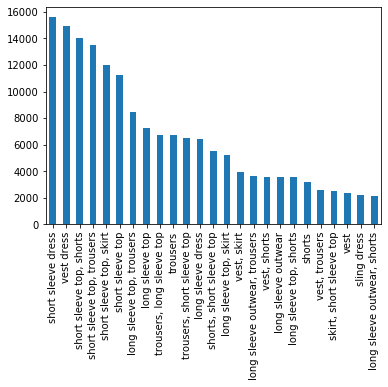

In [5]:
df2000 = train[train['category'].map(train['category'].value_counts()) > 2000]
df2000.category.value_counts().plot(kind="bar")

In [25]:
df2000.shape

(167571, 4)

In [13]:
import shutil
#for img in os.listdir('train/new_train'):
 #   shutil.move(f'train/new_train/{img}', f'train/image/{img}')
for img in os.listdir('validation/new_test'):
    shutil.move(f'validation/new_test/{img}', f'validation/image/{img}')

In [30]:
df2000 = df2000.sample(frac=1).reset_index(drop=True)
image = df2000.groupby('category').head(1)
images = [os.path.join('train','image',  x) for x in image['image']]
label = [y for y in image['category']]
images[0]

'train\\image\\006604.jpg'

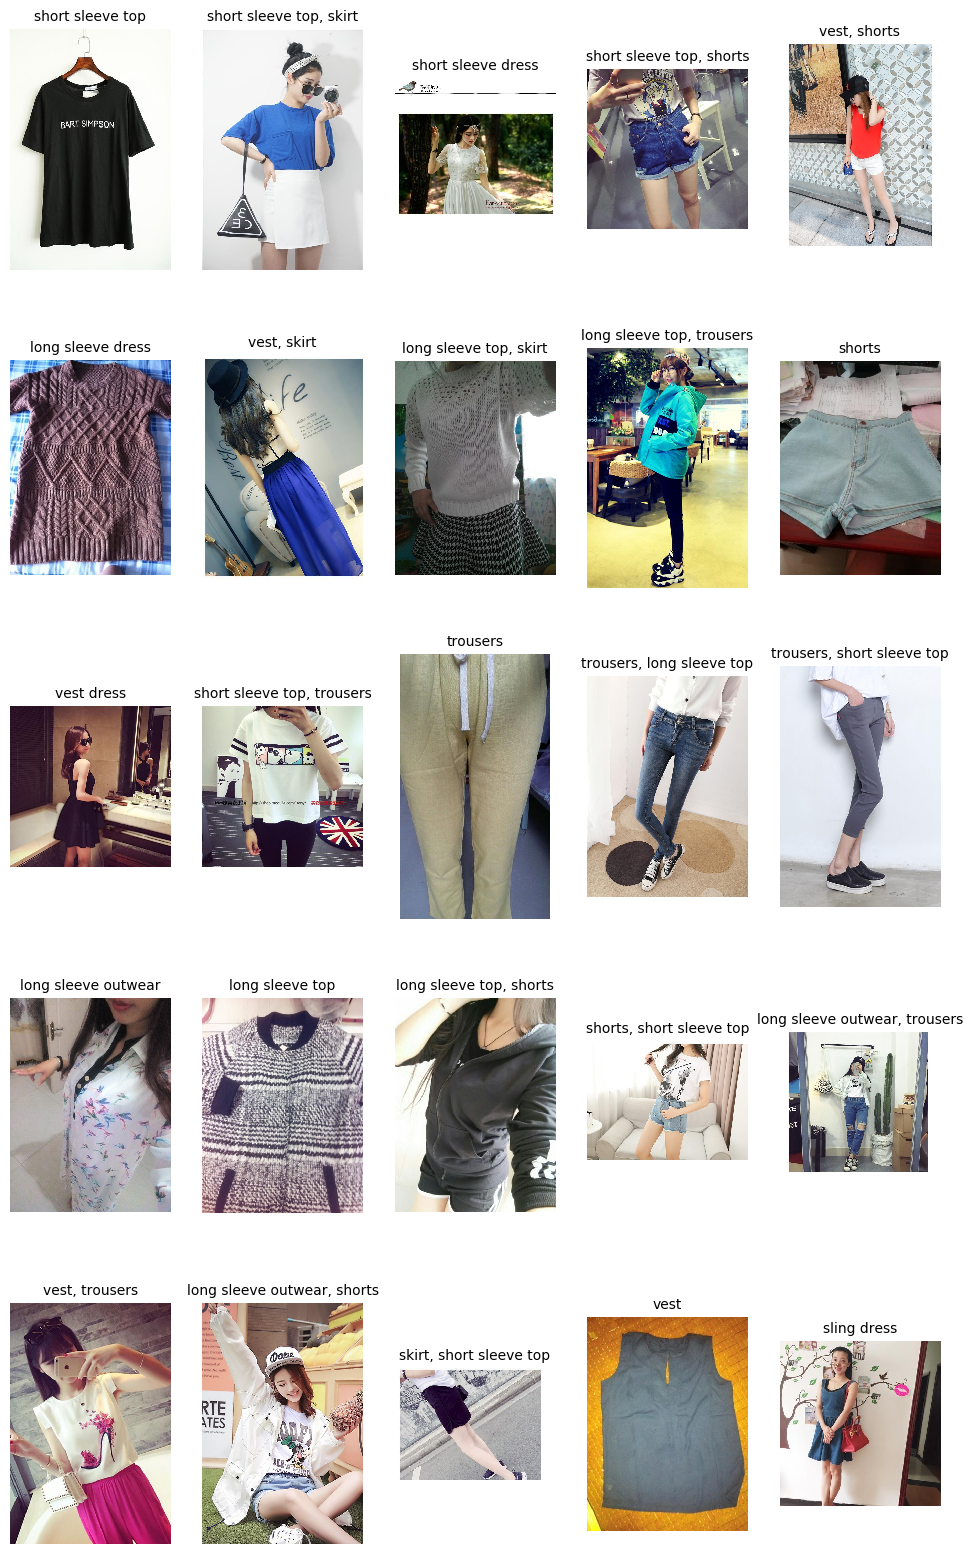

In [31]:
nobs = 25
ncols = 5
nrows = nobs//ncols 

style.use("default")
plt.figure(figsize=(12,4*nrows))
for i in range(nrows*ncols):
    ax = plt.subplot(nrows, ncols, i+1)
    plt.imshow(Image.open(images[i]))
    plt.title(label[i], size=10)
    plt.axis('off')

In [8]:
print(train.shape, df5000.shape)

(191961, 4) (134252, 4)


In [9]:
labels = df5000.category.unique()
print(labels)
print(df5000.source.value_counts())

['short sleeve top, trousers' 'long sleeve dress' 'long sleeve top'
 'long sleeve top, trousers' 'long sleeve top, skirt'
 'short sleeve top, skirt' 'shorts, short sleeve top'
 'short sleeve top, shorts' 'short sleeve top'
 'trousers, short sleeve top' 'trousers, long sleeve top' 'vest dress'
 'trousers' 'short sleeve dress']
shop    92129
user    42123
Name: source, dtype: int64


In [10]:
test = pd.read_csv('val.csv')
test = test[test['category'].isin(labels)]
print(test.category.value_counts())

short sleeve top, trousers    3535
short sleeve dress            2850
vest dress                    2760
short sleeve top, shorts      1899
short sleeve top              1817
short sleeve top, skirt       1790
long sleeve top, skirt        1580
long sleeve top, trousers     1353
long sleeve dress             1201
trousers, short sleeve top    1093
long sleeve top               1091
shorts, short sleeve top       667
trousers, long sleeve top      661
trousers                       649
Name: category, dtype: int64


In [19]:
train = df5000.groupby('category').head(2000)
print(train.category.value_counts(), train.source.value_counts())
print(train.head())
    

shorts, short sleeve top      2000
long sleeve top, trousers     2000
trousers                      2000
short sleeve top, shorts      2000
trousers, long sleeve top     2000
short sleeve top, trousers    2000
long sleeve dress             2000
short sleeve dress            2000
short sleeve top, skirt       2000
long sleeve top               2000
long sleeve top, skirt        2000
trousers, short sleeve top    2000
vest dress                    2000
short sleeve top              2000
Name: category, dtype: int64 shop    19450
user     8550
Name: source, dtype: int64
        image source                    category    id
0  000001.jpg   user  short sleeve top, trousers  1, 8
2  000003.jpg   user           long sleeve dress    11
3  000004.jpg   user           long sleeve dress    11
4  000005.jpg   user           long sleeve dress    11
5  000006.jpg   user           long sleeve dress    11


In [27]:
test = test.groupby('category').head(500)
print(test.category.value_counts(), test.source.value_counts())
print(test.head())
    

short sleeve top, shorts      500
vest dress                    500
short sleeve top, skirt       500
trousers, long sleeve top     500
short sleeve top, trousers    500
long sleeve top               500
long sleeve dress             500
long sleeve top, skirt        500
shorts, short sleeve top      500
long sleeve top, trousers     500
short sleeve dress            500
short sleeve top              500
trousers                      500
trousers, short sleeve top    500
Name: category, dtype: int64 user    5225
shop    1775
Name: source, dtype: int64
        image source            category  id
2  000003.jpg   user  short sleeve dress  10
3  000004.jpg   user  short sleeve dress  10
4  000005.jpg   user    short sleeve top   1
5  000006.jpg   user          vest dress  12
6  000007.jpg   user          vest dress  12


In [28]:
train_path = os.path.join('dataset', 'train', 'image')
test_path = os.path.join('dataset', 'validation', 'image')
new_train_path = os.path.join('dataset', 'new_train')
new_test_path = os.path.join('dataset', 'new_test')
train_images = list(train.image)
test_images = list(test.image)
if not os.path.exists(new_train_path) and not os.path.exists(new_test_path):
    os.mkdir(new_train_path)
    os.mkdir(new_test_path)

In [29]:
len(test_images)

7000

In [24]:
for image in os.listdir(new_train_path):
        shutil.move(os.path.join(train_path, image), os.path.join(new_train_path, image))

In [31]:
for image in test_images:
    shutil.move(os.path.join(test_path, image), os.path.join(new_test_path, image))

In [32]:
train.to_csv('new_train.csv', index=False)
test.to_csv('new_test.csv', index=False)